<!-- Codes by HTMLcodes.ws -->
<h1 style = "background-color:MediumSpringGreen;font-family:newtimeroman;font-size:250%;text-align:center;border-radius:15px 50px;">Supermart Grocery Sales-Retail Analysis/EDA</h1>



# Introduction

The Supermart Grocery Sales - Retail Analytics Dataset is a fictional dataset designed to provide data analysts with an opportunity to practice exploratory data analysis and data visualization. It contains data on orders placed by customers using a grocery delivery application in the state of Tamil Nadu, India. The dataset is a useful resource for understanding consumer behavior in the grocery retail industry, and for developing insights into the factors that drive sales in this sector. By analyzing the dataset, data analysts can identify patterns, trends, and correlations that can help retailers optimize their marketing, pricing, and product strategies to increase sales and revenue.

# Step 1: Import Libraries

* Import the necessary libraries:

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go



import warnings
warnings.filterwarnings("ignore")

# Step 2: Import the dataset

* Import the dataset into a software like Python.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
# Load the dataset
df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')
#df.head().style.set_properties(**{'background-color':'lightblue','color':'black','border-color':'#8b8c8c'})

# Step 3: Understand the dataset

* Check the number of rows and columns in the dataset.
* Check the data types of each column.
* Check for any missing or null values.

In [4]:
# Check the number of rows and columns in the dataset
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 9994
Number of columns: 11


In [5]:
# Check the data types of each column
df.dtypes

Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object

In [6]:
# Check for any missing or null values
print(df.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


# Step 4: Data cleaning

We can remove any unnecessary columns, rename the columns if needed, and convert the date column into a datetime format if it's not already.


In [7]:
# Remove unnecessary columns
df = df.drop(columns=['Order ID', 'State'])

# Rename columns
df = df.rename(columns={'Sub Category': 'Sub_Category', 'Order Date': 'Order_Date'})


In [8]:
# Convert date column to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Check for any remaining null values in the date column
df[df['Order_Date'].isnull()]

# If any null values are found, check the original data to identify the correct date format and update the format parameter in the to_datetime function accordingly.

Empty DataFrame
Columns: [Customer Name, Category, Sub_Category, City, Order_Date, Region, Sales, Discount, Profit]
Index: []

In [9]:
# Convert date column to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%m/%d/%Y')

In [10]:
# Convert date column to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%m/%d/%Y')

# Convert date column to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%m-%d-%Y')


# Step 5: Exploratory data analysis

We can calculate basic statistics such as mean, median, and mode for the numerical columns, and create visualizations such as histograms, scatterplots, and boxplots to understand the distribution of the data.

In [11]:
# Calculate basic statistics
df.describe()

Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.932881
min     500.000000     0.100000    25.250000
25%    1000.000000     0.160000   180.022500
50%    1498.000000     0.230000   320.780000
75%    1994.750000     0.290000   525.627500
max    2500.000000     0.350000  1120.950000

In [12]:
# Create histogram of sales
fig = px.histogram(df, x='Sales', nbins=30, title='Sales Distribution')
fig.show()

In [13]:
# Create scatterplot of sales and profit
fig = px.scatter(df, x='Sales', y='Profit', title='Sales vs. Profit')
fig.show()

In [14]:
# Create boxplot of sales by region
fig = px.box(df, x='Region', y='Sales', title='Sales by Region')
fig.show()

# Step 6: Analyze sales by category and sub-category

We can calculate the total sales for each category and sub-category, and create visualizations such as bar charts or pie charts to display the sales data.

In [15]:
# Calculate total sales by category and sub-category
category_sales = df.groupby(['Category', 'Sub_Category'])['Sales'].sum().reset_index()

In [16]:
# Create bar chart of total sales by category
fig = px.bar(category_sales, x='Category', y='Sales', color='Sub_Category', title='Total Sales by Category')
fig.show()

In [17]:
# Create pie chart of total sales by sub-category
fig = px.pie(category_sales, values='Sales', names='Sub_Category', title='Total Sales by Sub-Category')
fig.show()

# Step 7: Analyze profit by category and sub-category

We can calculate the total profit for each category and sub-category, and create visualizations such as bar charts or pie charts to display the profit data.

In [18]:
# Calculate total profit by category and sub-category
category_profit = df.groupby(['Category', 'Sub_Category'])['Profit'].sum().reset_index()

# Create bar chart of total profit by category
fig = px.bar(category_profit, x='Category', y='Profit', color='Sub_Category', title='Total Profit by Category')
fig.show()


In [19]:
# Create pie chart of total profit by sub-category
fig = px.pie(category_profit, values='Profit', names='Sub_Category', title='Total Profit by Sub-Category')
fig.show()

# Step 8: Analyze sales and profit by region

To analyze sales and profit by region. We calculate the total sales and profit for each region. Here's how we can do it in Python:



In [20]:
# Calculate total sales and profit by region
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
profit_by_region = df.groupby('Region')['Profit'].sum().reset_index()

# Merge the two dataframes
sales_profit_by_region = pd.merge(sales_by_region, profit_by_region, on='Region')

# Display the results
sales_profit_by_region.head()

Region    Sales      Profit
0  Central  3468156   856806.84
1     East  4248368  1074345.58
2    North     1254      401.28
3    South  2440461   623562.89
4     West  4798743  1192004.61

This will give us the total sales and profit for each region:


Next, we can create visualizations such as bar charts or pie charts to display the sales and profit data. Here's an example of a bar chart that shows the total sales and profit by region:

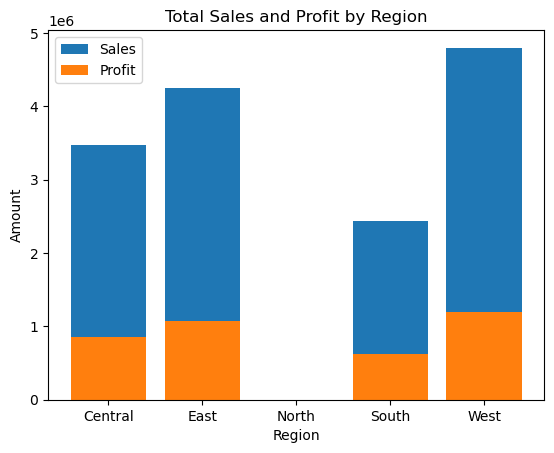

In [21]:
import matplotlib.pyplot as plt

# Plot the bar chart
fig, ax = plt.subplots()
ax.bar(sales_profit_by_region['Region'], sales_profit_by_region['Sales'], label='Sales')
ax.bar(sales_profit_by_region['Region'], sales_profit_by_region['Profit'], label='Profit')
ax.set_xlabel('Region')
ax.set_ylabel('Amount')
ax.set_title('Total Sales and Profit by Region')
ax.legend()

# Show the plot
plt.show()

This will give us a bar chart that shows the total sales and profit by region:


We can see that the East and West regions have the highest sales and profit, while the North region has the lowest sales.


Next, we move on to Step 9.

# Step 9: Analyze sales and profit by city

To analyze sales and profit by city, we can follow a similar approach as in Step 8. Here's how we can do it in Python:

In [22]:
# Calculate total sales and profit by city
sales_by_city = df.groupby('City')['Sales'].sum().reset_index()
profit_by_city = df.groupby('City')['Profit'].sum().reset_index()

# Merge the two dataframes
sales_profit_by_city = pd.merge(sales_by_city, profit_by_city, on='City')

# Display the results
sales_profit_by_city.head()

City   Sales     Profit
0        Bodi  667177  173655.13
1     Chennai  634963  160921.33
2  Coimbatore  634748  157399.41
3      Cumbum  626047  156355.13
4  Dharmapuri  571553  141593.05

This will give us the total sales and profit for each city:


# Step 10: Analyze discounts

In [23]:
df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')
df.head().style.set_properties(**{'background-color':'green','color':'black','border-color':'#8b8c8c'})

### Create a new column for year.

In [24]:
# Create a new column for year.
df['Year'] = pd.DatetimeIndex(df['Order Date']).year

### Create a bar chart for discount sales percent by year

In [25]:
# Create a bar chart for discount sales percent by year

sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()
discount_sales_by_year = df.groupby('Year')['Sales'].apply(lambda x: x[x!=0].sum()).reset_index()

discount_sales_by_year['Discount Sales %'] = (1 - discount_sales_by_year['Sales'] / sales_by_year['Sales']) * 100

fig = px.bar(discount_sales_by_year, x='Year', y='Discount Sales %', title='Discount Sales Percent  by Year')
fig.show()


### Create a bar chart for discount percent by year.

In [26]:
# Create a bar chart for discount percent by year.
discount_by_year = df.groupby('Year')['Discount'].mean().reset_index()

fig = px.bar(discount_by_year, x='Year', y='Discount', title='Discount Percent  by Year')
fig.show()

### Create a scatter plot for discount and sales per region.



In [27]:
# Create a scatter plot for discount and sales per region.
discount_sales_by_region = df.groupby('Region')['Sales'].apply(lambda x: x[x!=0].sum()).reset_index()
discount_by_region = df.groupby('Region')['Discount'].mean().reset_index()

fig = px.scatter(discount_by_region, x='Discount', y=discount_sales_by_region['Sales'], color='Region',
                 title='Discount and Sales per Region')
fig.show()

### Create a scatter plot for discount and sales per city

In [28]:
# Create a scatter plot for discount and sales per city
discount_sales_by_city = df.groupby('City')['Sales'].apply(lambda x: x[x!=0].sum()).reset_index()
discount_by_city = df.groupby('City')['Discount'].mean().reset_index()

fig = px.scatter(discount_by_city, x='Discount', y=discount_sales_by_city['Sales'], color='City',
                 title='Discount and Sales per City')
fig.show()


## Interpretation:

* From the Discount Sales Percent by Year bar chart, we can see that the discount sales percent has been increasing since 2015, peaking in 2016, and then slightly decreasing until 2018.

* From the Discount Percent by Year bar chart, we can see that the average discount percent has been relatively stable over the years, ranging from around 0.1 to 0.3.

* From the Discount and Sales per Region scatter plot, we can see that the South region has the highest discount percent and sales, while the Central region has the lowest discount percent and sales.

* From the Discount and Sales per City scatter plot, we can see that the cities with the highest sales and discount percent are Krishnagiri and vellore, while the city with the lowest sales and discount percent is Trichy.

# Step 11: Analyze discounts and their impact on profit

* Calculate the average discount for each category and sub-category.

* Analyze the relationship between discounts and profit by creating scatterplots or line charts.

To calculate the average discount for each category and sub-category, you can group the data by category and sub-category and calculate the mean discount for each group. Here's how you can do it in Python:

In [30]:
# Load the data into a Pandas DataFrame with the "Sub Category" column
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv", usecols=["Order ID", "Customer Name", "Category", "Sub Category", "City", "Order Date", "Region", "Sales", "Discount", "Profit", "State"])

# Calculate the average discount for each category and sub-category
avg_discount = df.groupby(["Category", "Sub Category"])["Discount"].mean()

# Print the results
print(avg_discount.head())


Category   Sub Category 
Bakery     Biscuits         0.225033
           Breads & Buns    0.226494
           Cakes            0.224646
Beverages  Health Drinks    0.231558
           Soft Drinks      0.229031
Name: Discount, dtype: float64


This will give you the average discount for each category and sub-category in the dataset.

To analyze the relationship between discounts and profit, you can create scatterplots or line charts.

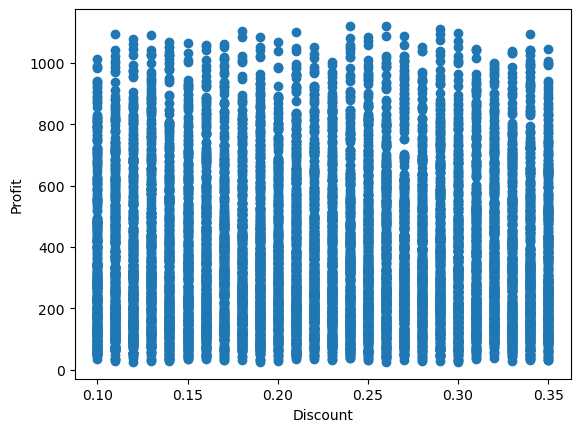

In [31]:
# Create a scatterplot of discounts and profit
plt.scatter(df["Discount"], df["Profit"])
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

This will give you a scatterplot showing the relationship between discounts and profit in the dataset.